In [1]:
from keras.models import Sequential, Model, load_model
from keras import layers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from keras.optimizers import adam, RMSprop
import keras.backend as K
from keras.callbacks import TensorBoard
from time import time
import tensorflow as tf
from keras.layers import Dense, Input, Lambda, LeakyReLU
from keras.layers import Dropout
from keras.objectives import binary_crossentropy, mse
import keras.backend as K
from keras import metrics
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score
from keras.utils import to_categorical
from keras.metrics import mae
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import sys
from tqdm import tqdm_notebook
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from skimage import exposure
from skimage import io
import imageio
from skimage.color import rgb2gray
from skimage import exposure
import random
import warnings

from sklearn.metrics import median_absolute_error
from keras.applications import VGG16, VGG19, InceptionV3, MobileNet

from keras.models import Model, load_model,Sequential
from keras.layers import Input,LeakyReLU,RepeatVector,Reshape, Activation
from keras.layers.core import Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Reshape, Dense, Input, Lambda, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import concatenate, merge, Input, UpSampling2D, MaxPooling2D, GlobalAveragePooling3D, Conv2DTranspose


C:\Users\roberto\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("D:/MBIT-2017-18-Master-Deep-Learning/Reto - Cajamar - Febrero 2019/Datasets_Reto_Modelling_UH2019/Modelar_UH2019.txt", sep='|',decimal=".")


In [3]:
print(data.shape)

(9958, 53)


In [4]:
data.head()

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET
0,6028499,18151,Granada,Plaza de Garaje ubicada en la planta sótano de...,NaN,Garaje,NaN,NaN,35.00,0,...,5.09,626.38,237.0,51.01,71,7.14,10.65,2,46,32.16
1,6028500,29915,Málaga,NaN,NaN,Casa de pueblo,NaN,NaN,151.98,2,...,4.08,700.00,6.0,50.69,684,16.36,5.25,1,47,30.71
2,6028502,3740,Alicante,El inmueble(piso) se encuentra situado en el d...,VIVIENDA-PISO,Piso,2008.0,92.58,102.78,1,...,4.43,525.00,15.0,51.82,651,15.12,11.21,1,47,63.48
3,6028512,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,11.81,12.46,0,...,5.03,863.17,168.0,50.74,92,15.82,14.55,2,47,108.27
4,6028513,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,14.29,15.43,0,...,5.03,863.17,168.0,50.74,3,0.00,0.00,2,39,7.50


In [5]:
data.iloc[1:51] = data.iloc[1:51].replace(0, np.NaN)
print(data.isnull().sum())

HY_id                                 0
HY_cod_postal                         0
HY_provincia                         42
HY_descripcion                     3942
HY_distribucion                    6745
HY_tipo                               0
HY_antiguedad                      5484
HY_metros_utiles                   2886
HY_metros_totales                    34
HY_num_banos                         14
HY_cert_energ                      8300
HY_num_terrazas                      48
HY_ascensor                          30
HY_trastero                          44
HY_num_garajes                       40
HY_precio                             1
HY_precio_anterior                 3158
IDEA_area                          2631
IDEA_poblacion                     2635
IDEA_densidad                      2635
IDEA_pc_1960                       2716
IDEA_pc_1960_69                    2716
IDEA_pc_1970_79                    2712
IDEA_pc_1980_89                    2711
IDEA_pc_1990_99                    2711


In [6]:
data.HY_provincia = data.HY_cod_postal // 1000

In [7]:
data.HY_provincia.head()

0    18
1    29
2     3
3    30
4    30
Name: HY_provincia, dtype: int64

In [8]:
data.HY_metros_totales.fillna(data.HY_metros_totales.mean(), inplace=True)

In [9]:
data.HY_metros_utiles.fillna((data.HY_metros_totales * data.HY_metros_utiles.mean() / data.HY_metros_totales.mean()), inplace=True)

In [10]:
data.HY_num_banos.fillna(0, inplace=True)
data.HY_num_terrazas.fillna(0, inplace=True)
data.HY_ascensor.fillna(0, inplace=True)
data.HY_trastero.fillna(0, inplace=True)
data.HY_num_garajes.fillna(0, inplace=True)
data.HY_precio.fillna(0, inplace=True)                           

In [11]:
data.HY_precio_anterior.fillna(data.HY_precio, inplace=True)

In [12]:
data.GA_mean_bounce.fillna(data.GA_mean_bounce.mean(), inplace=True)
data.GA_exit_rate.fillna(data.GA_exit_rate.mean(), inplace=True)

In [13]:
data.IDEA_ind_elasticidad.fillna(0, inplace=True)

In [14]:
data.IDEA_area.fillna(data.IDEA_area.mean(),inplace=True)
data.IDEA_poblacion.fillna(data.IDEA_poblacion.mean(),inplace=True)
data.IDEA_densidad.fillna(data.IDEA_densidad.mean(), inplace=True)
data.IDEA_pc_1960.fillna(data.IDEA_pc_1960.mean(), inplace=True)
data.IDEA_pc_1960_69.fillna(data.IDEA_pc_1960_69.mean(), inplace=True)
data.IDEA_pc_1970_79.fillna(data.IDEA_pc_1970_79.mean(), inplace=True)
data.IDEA_pc_1980_89.fillna(data.IDEA_pc_1980_89.mean(), inplace=True)
data.IDEA_pc_1990_99.fillna(data.IDEA_pc_1990_99.mean(), inplace=True)
data.IDEA_pc_2000_10.fillna(data.IDEA_pc_2000_10.mean(), inplace=True)
data.IDEA_pc_comercio.fillna(data.IDEA_pc_comercio.mean(), inplace=True)
data.IDEA_pc_industria.fillna(data.IDEA_pc_industria.mean(), inplace=True)
data.IDEA_pc_oficina.fillna(data.IDEA_pc_oficina.mean(), inplace=True)
data.IDEA_pc_otros.fillna(data.IDEA_pc_otros.mean(), inplace=True)
data.IDEA_pc_residencial.fillna(data.IDEA_pc_residencial.mean(), inplace=True)
data.IDEA_pc_trast_parking.fillna(data.IDEA_pc_trast_parking.mean(), inplace=True)
data.IDEA_ind_tienda.fillna(data.IDEA_ind_tienda.mean(), inplace=True)
data.IDEA_ind_turismo.fillna(data.IDEA_ind_turismo.mean(), inplace=True)
data.IDEA_ind_alimentacion.fillna(data.IDEA_ind_alimentacion.mean(), inplace=True)
data.IDEA_ind_riqueza.fillna(data.IDEA_ind_riqueza.mean(), inplace=True)
data.IDEA_rent_alquiler.fillna(data.IDEA_rent_alquiler.mean(), inplace=True)
data.IDEA_ind_liquidez.fillna(data.IDEA_ind_liquidez.mean(), inplace=True)
data.IDEA_unitprice_sale_residential.fillna(data.IDEA_unitprice_sale_residential.mean(), inplace=True)
data.IDEA_price_sale_residential.fillna(data.IDEA_price_sale_residential.mean(), inplace=True)
data.IDEA_stock_sale_residential.fillna(data.IDEA_stock_sale_residential.mean(), inplace=True)
data.IDEA_demand_sale_residential.fillna(data.IDEA_demand_sale_residential.mean(), inplace=True)
data.IDEA_unitprice_rent_residential.fillna(data.IDEA_unitprice_rent_residential.mean(), inplace=True)
data.IDEA_price_rent_residential.fillna(data.IDEA_price_rent_residential.mean(), inplace=True)
data.IDEA_stock_rent_residential.fillna(data.IDEA_stock_rent_residential.mean(), inplace=True)
data.IDEA_demand_rent_residential.fillna(data.IDEA_demand_rent_residential.mean(), inplace=True)

In [15]:
data.HY_cert_energ.fillna(0, inplace=True)
data.loc[(data['HY_cert_energ'] != 0),'HY_cert_energ'] = 1

In [16]:
print(data.isnull().sum())

HY_id                                 0
HY_cod_postal                         0
HY_provincia                          0
HY_descripcion                     3942
HY_distribucion                    6745
HY_tipo                               0
HY_antiguedad                      5484
HY_metros_utiles                      0
HY_metros_totales                     0
HY_num_banos                          0
HY_cert_energ                         0
HY_num_terrazas                       0
HY_ascensor                           0
HY_trastero                           0
HY_num_garajes                        0
HY_precio                             0
HY_precio_anterior                    0
IDEA_area                             0
IDEA_poblacion                        0
IDEA_densidad                         0
IDEA_pc_1960                          0
IDEA_pc_1960_69                       0
IDEA_pc_1970_79                       0
IDEA_pc_1980_89                       0
IDEA_pc_1990_99                       0


In [17]:
data['HY_tipo'].value_counts()

Piso                            4182
Garaje                          2761
Local                            827
Casa de pueblo                   557
Chalet adosado                   433
Trastero                         282
Chalet independiente             209
Solar                            198
Dúplex                           184
Nave adosada                     130
Oficina                          103
Nave aislada                      38
Edificio turístico                17
Otro                              12
Chalet pareado                     9
Ático                              8
Almacén                            3
Edificio comercial                 2
Suelo rústico no urbanizable       2
Aparcamiento                       1
Name: HY_tipo, dtype: int64

# Separación por tipología del inmueble (viviendas / otros)

In [18]:
#data = data.loc[(data['HY_tipo'] == 'Casa de pueblo') | (data['HY_tipo'] == 'Chalet adosado') | (data['HY_tipo'] == 'Chalet independiente') | (data['HY_tipo'] == 'Chalet pareado') | (data['HY_tipo'] == 'Dúplex') | (data['HY_tipo'] == 'Ático') | (data['HY_tipo'] == 'Piso')]
#data = data.loc[(data['HY_tipo'] == 'Garaje') | (data['HY_tipo'] == 'Local') | (data['HY_tipo'] == 'Nave adosada') | (data['HY_tipo'] == 'Solar') | (data['HY_tipo'] == 'Trastero')]
#data = data.loc[(data['HY_tipo'] == 'Garaje')]

# Creación de nuevas variables para enriquecer el modelo

In [19]:
precio_medio_cod_postal = data.groupby("HY_cod_postal").agg({"HY_precio": "mean"}).reset_index().rename(
    columns={'HY_cod_postal':'ID','HY_precio' : 'NW_precio_medio_CP'})

In [20]:
precio_medio_cod_postal.head()

,ID,NW_precio_medio_CP
0,2001,63500.000000
1,2006,7628.571429
2,2007,60600.000000
3,2100,101000.000000
4,2156,149500.000000


In [21]:
data = data.join(precio_medio_cod_postal.set_index('ID'), on='HY_cod_postal', how='left')

In [22]:
data["NW_ind_precio"] = (data.HY_precio / data.NW_precio_medio_CP)
data["NW_ind_oferta"] = ((data.HY_precio_anterior - data.HY_precio) / (data.NW_precio_medio_CP + 1))
data["NW_count_descrip"] = data['HY_descripcion'].str.split(' ').str.len()
data.NW_ind_precio.fillna(0, inplace=True)
data.NW_ind_oferta.fillna(0, inplace=True)
data.NW_count_descrip.fillna(0, inplace=True)

In [23]:
data['NW_ind_reforma'] = data['HY_descripcion'].str.count('reforma')
data.NW_ind_reforma.fillna(0, inplace=True)
data.loc[(data['NW_ind_reforma'] > 1),'NW_ind_reforma'] = 1

In [24]:
word2int={'un':1,'dos':2,'tres':3,'cuatro':4,'cinco':5,'seis':6,'siete':7,'ocho':8,'nueve':9,'diez':10}

for HY_tipo in ['Piso','Casa de pueblo','Chalet adosado','Chalet independiente','Dúplex','Chalet pareado','Ático']:
    data.loc[data.loc[data['HY_tipo']==HY_tipo,'HY_descripcion'].dropna().apply(lambda x:x.split("dormitorio",1)[0]).apply(lambda x:x.split(" ")).apply(lambda x:x[-2]).str.lower().map(word2int).index,'NW_habitaciones']=data.loc[data['HY_tipo']==HY_tipo,'HY_descripcion'].dropna().apply(lambda x:x.split("dormitorio",1)[0]).apply(lambda x:x.split(" ")).apply(lambda x:x[-2]).str.lower().map(word2int)
    
    for element1 in pd.to_numeric(data.loc[data['HY_tipo']==HY_tipo,'HY_descripcion'].dropna().apply(lambda x:x.split("dormitorio",1)[0]).apply(lambda x:x.split(" ")).apply(lambda x:x[-2]),'coerce').dropna().index:
        if pd.isnull(data.loc[element1,'NW_habitaciones']):
            data.loc[element1,'NW_habitaciones']=pd.to_numeric(data.loc[data['HY_tipo']==HY_tipo,'HY_descripcion'].dropna().apply(lambda x:x.split("dormitorio",1)[0]).apply(lambda x:x.split(" ")).apply(lambda x:x[-2]),'coerce').dropna()[element1]

    # data.loc[data['HY_tipo']==HY_tipo,'HY_descripcion'].dropna().apply(lambda x:x.split("habitacion",1)[0]).apply(lambda x:x.split(" ")).apply(lambda x:x[-2]).str.lower().map(word2int)
    for element2 in data.loc[data['HY_tipo']==HY_tipo,'HY_descripcion'].dropna().apply(lambda x:x.split("habitacion",1)[0]).apply(lambda x:x.split(" ")).apply(lambda x:x[-2]).str.lower().map(word2int).index:
        if pd.isnull(data.loc[element2,'NW_habitaciones']):
            data.loc[element2,'NW_habitaciones']=data.loc[data['HY_tipo']==HY_tipo,'HY_descripcion'].dropna().apply(lambda x:x.split("habitacion",1)[0]).apply(lambda x:x.split(" ")).apply(lambda x:x[-2]).str.lower().map(word2int)[element2]

    # pd.to_numeric(data.loc[data['HY_tipo']==HY_tipo,'HY_descripcion'].dropna().apply(lambda x:x.split("habitacion",1)[0]).apply(lambda x:x.split(" ")).apply(lambda x:x[-2]),'coerce').dropna()
    for element3 in pd.to_numeric(data.loc[data['HY_tipo']==HY_tipo,'HY_descripcion'].dropna().apply(lambda x:x.split("habitacion",1)[0]).apply(lambda x:x.split(" ")).apply(lambda x:x[-2]),'coerce').dropna().index:
        if pd.isnull(data.loc[element3,'NW_habitaciones']):
            data.loc[element3,'NW_habitaciones']=pd.to_numeric(data.loc[data['HY_tipo']==HY_tipo,'HY_descripcion'].dropna().apply(lambda x:x.split("habitacion",1)[0]).apply(lambda x:x.split(" ")).apply(lambda x:x[-2]),'coerce').dropna()[element3]
    
    data.loc[data['HY_tipo']==HY_tipo,'NW_habitaciones']=data.loc[data['HY_tipo']==HY_tipo,'NW_habitaciones'].fillna(1)

data.loc[data.loc[:,'NW_habitaciones']>9,'NW_habitaciones']=1
data['NW_habitaciones'] = data['NW_habitaciones'].fillna(0)

In [25]:
data_dir = 'D:/MBIT-2017-18-Master-Deep-Learning/Reto - Cajamar - Febrero 2019/imagenes_inmuebles_haya'

In [26]:
imagen = next(os.walk(data_dir))[2]
imagen[0:5]

['6028499__posifoto1__qm2eBORaFws.jpg',
 '6028499__posifoto2__qm2eBhKxMHp.jpg',
 '6028499__posifoto3__qm2eAImwzo9.jpg',
 '6028499__posifoto4__qm2eAb5E1KX.jpg',
 '6028499__posifoto5__qm2eyj82lhX.jpg']

In [27]:
id_imagen = []
for i in range(len(imagen)):
    id_imagen = id_imagen + [imagen[i]]
    
id_imagen[0:5]

['6028499__posifoto1__qm2eBORaFws.jpg',
 '6028499__posifoto2__qm2eBhKxMHp.jpg',
 '6028499__posifoto3__qm2eAImwzo9.jpg',
 '6028499__posifoto4__qm2eAb5E1KX.jpg',
 '6028499__posifoto5__qm2eyj82lhX.jpg']

In [28]:
id_clien = []
for i in range(len(imagen)):
    id_clien = id_clien + [(imagen[i].split("__")[0])]
    
id_clien[0:5]

['6028499', '6028499', '6028499', '6028499', '6028499']

In [29]:
data_fotos = pd.DataFrame(id_clien,columns=['id'],dtype='int')

In [30]:
data_fotos_aux = data_fotos.groupby("id").agg({"id": "count"}).add_suffix('_count').reset_index().rename(
    columns={'id':'ID','id_count' : 'NW_count_photos'})

In [31]:
data_fotos_aux.head()

,ID,NW_count_photos
0,6028499,5
1,6028500,3
2,6028502,10
3,6028512,2
4,6028513,2


In [32]:
data = data.join(data_fotos_aux.set_index('ID'), on='HY_id', how='left')

In [33]:
data.NW_count_photos.max()

10.0

In [34]:
data.NW_count_photos.fillna(0, inplace=True)

In [35]:
data.head()

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,GA_quincena_ini,GA_quincena_ult,TARGET,NW_precio_medio_CP,NW_ind_precio,NW_ind_oferta,NW_count_descrip,NW_ind_reforma,NW_habitaciones,NW_count_photos
0,6028499,18151,18,Plaza de Garaje ubicada en la planta sótano de...,NaN,Garaje,NaN,30.364546,35.00,0.0,...,2,46,32.16,139433.333333,0.088214,0.000000,61.0,0.0,0.0,5.0
1,6028500,29915,29,NaN,NaN,Casa de pueblo,NaN,131.851534,151.98,2.0,...,1,47,30.71,115000.000000,1.000000,0.086956,0.0,0.0,1.0,3.0
2,6028502,3740,3,El inmueble(piso) se encuentra situado en el d...,VIVIENDA-PISO,Piso,2008.0,92.580000,102.78,1.0,...,1,47,63.48,84433.333333,1.042242,0.065139,36.0,0.0,1.0,10.0
3,6028512,30592,30,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,11.810000,12.46,0.0,...,2,47,108.27,54895.000000,0.105656,0.000000,24.0,0.0,0.0,2.0
4,6028513,30592,30,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,14.290000,15.43,0.0,...,2,39,7.50,54895.000000,0.134803,0.000000,24.0,0.0,0.0,2.0


In [36]:
print(data.isnull().sum())

HY_id                                 0
HY_cod_postal                         0
HY_provincia                          0
HY_descripcion                     3942
HY_distribucion                    6745
HY_tipo                               0
HY_antiguedad                      5484
HY_metros_utiles                      0
HY_metros_totales                     0
HY_num_banos                          0
HY_cert_energ                         0
HY_num_terrazas                       0
HY_ascensor                           0
HY_trastero                           0
HY_num_garajes                        0
HY_precio                             0
HY_precio_anterior                    0
IDEA_area                             0
IDEA_poblacion                        0
IDEA_densidad                         0
IDEA_pc_1960                          0
IDEA_pc_1960_69                       0
IDEA_pc_1970_79                       0
IDEA_pc_1980_89                       0
IDEA_pc_1990_99                       0


# Variables de entrada - datos

In [37]:
from sklearn import preprocessing 
x_data_cat1=to_categorical((data.iloc[:,1] // 1000),num_classes=52)
x_data_cat2=to_categorical((data.iloc[:,1] % 1000),num_classes=999)
encoder = LabelEncoder()
encoder.fit(data.HY_tipo)
x_data_cat3=to_categorical(encoder.transform(data.HY_tipo), num_classes = 20)
x_data_cat4=to_categorical(data.HY_cert_energ)
x_data_cat5=to_categorical(data.NW_count_photos, num_classes = 15)
x_data_cat6=to_categorical(data.IDEA_ind_elasticidad, num_classes = 6)
x_data_categorical = np.hstack((x_data_cat1, x_data_cat2, x_data_cat3, x_data_cat4, x_data_cat5, x_data_cat6))

x_data_continuas=data.iloc[:,[7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,54,55,56]]
scaler = StandardScaler().fit(x_data_continuas)
x_data_continuas = scaler.transform(x_data_continuas)

x_data = np.hstack((x_data_categorical, x_data_continuas))
print(x_data.shape)

y_data = np.log1p(data.iloc[:,52:53])
print(y_data.shape)

(9958, 1141)
(9958, 1)


In [38]:
f_train, f_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=42)

# Modelo VAE - variables clientes

In [39]:
original_dim = x_data.shape[1]
latent_dim = 5
intermediate_dim = 256
epsilon_std = 1.0

x_feature = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x_feature)
z_mean_f = Dense(latent_dim)(h)
z_log_var_f = Dense(latent_dim)(h)

def sampling(args):
    z_mean_f, z_log_var_f = args
    epsilon = K.random_normal(shape=(K.shape(z_mean_f)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean_f + K.exp(z_log_var_f / 2) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean_f, z_log_var_f])

# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# instantiate VAE model
vae_features = Model(x_feature, x_decoded_mean)

# Compute VAE loss
xent_loss = original_dim * metrics.binary_crossentropy(x_feature, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var_f - K.square(z_mean_f) - K.exp(z_log_var_f), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae_features.add_loss(vae_loss)
vae_features.compile(optimizer='rmsprop')
vae_features.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1141)         0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          292352      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 5)            1285        dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 5)            1285        dense_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (

In [40]:
LOAD_MODEL = False
batch_size = 64
epochs = 250
filepath="autoencoder_model_vae_cajamar_completo_v10.h5" 

if not LOAD_MODEL:
    checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,
                                     save_best_only=True,
                                     mode='min') # graba sólo los que mejoran en validación
    
    callbacks_list = [checkpoint]
    
    vae_features.fit(f_train,
            shuffle=True,
            epochs=epochs,
            batch_size=batch_size,
            callbacks = callbacks_list,
            verbose=0,
            validation_data=(f_test, None))
    
vae_features.save_weights('autoencoder_weights_vae_cajamar_completo_v10.h5')


Epoch 00001: val_loss improved from inf to -35.59574, saving model to autoencoder_model_vae_cajamar_completo_v10.h5

Epoch 00002: val_loss improved from -35.59574 to -83.30158, saving model to autoencoder_model_vae_cajamar_completo_v10.h5

Epoch 00003: val_loss improved from -83.30158 to -107.05458, saving model to autoencoder_model_vae_cajamar_completo_v10.h5

Epoch 00004: val_loss improved from -107.05458 to -117.98651, saving model to autoencoder_model_vae_cajamar_completo_v10.h5

Epoch 00005: val_loss improved from -117.98651 to -125.81385, saving model to autoencoder_model_vae_cajamar_completo_v10.h5

Epoch 00006: val_loss improved from -125.81385 to -131.07824, saving model to autoencoder_model_vae_cajamar_completo_v10.h5

Epoch 00007: val_loss improved from -131.07824 to -134.87502, saving model to autoencoder_model_vae_cajamar_completo_v10.h5

Epoch 00008: val_loss improved from -134.87502 to -138.58323, saving model to autoencoder_model_vae_cajamar_completo_v10.h5

Epoch 0000

Epoch 00096: val_loss did not improve from -165.35417

Epoch 00097: val_loss improved from -165.35417 to -165.73656, saving model to autoencoder_model_vae_cajamar_completo_v10.h5

Epoch 00098: val_loss did not improve from -165.73656

Epoch 00099: val_loss did not improve from -165.73656

Epoch 00100: val_loss did not improve from -165.73656

Epoch 00101: val_loss did not improve from -165.73656

Epoch 00102: val_loss did not improve from -165.73656

Epoch 00103: val_loss did not improve from -165.73656

Epoch 00104: val_loss did not improve from -165.73656

Epoch 00105: val_loss did not improve from -165.73656

Epoch 00106: val_loss did not improve from -165.73656

Epoch 00107: val_loss did not improve from -165.73656

Epoch 00108: val_loss did not improve from -165.73656

Epoch 00109: val_loss did not improve from -165.73656

Epoch 00110: val_loss did not improve from -165.73656

Epoch 00111: val_loss did not improve from -165.73656

Epoch 00112: val_loss did not improve from -165.73

Epoch 00242: val_loss did not improve from -166.18640

Epoch 00243: val_loss did not improve from -166.18640

Epoch 00244: val_loss did not improve from -166.18640

Epoch 00245: val_loss did not improve from -166.18640

Epoch 00246: val_loss did not improve from -166.18640

Epoch 00247: val_loss did not improve from -166.18640

Epoch 00248: val_loss did not improve from -166.18640

Epoch 00249: val_loss did not improve from -166.18640

Epoch 00250: val_loss did not improve from -166.18640


In [41]:
encoder_f = Model(x_feature, z_mean_f)

In [42]:
client_rep_latente = encoder_f.predict(x_data, batch_size=batch_size)

In [43]:
print(data.shape)
print(client_rep_latente.shape)
print(client_rep_latente[0:1,])

(9958, 60)
(9958, 5)
[[ 1.5393128   0.64497924 -2.1700191   1.3554271  -0.89282954]]


In [44]:
for i in range (client_rep_latente.shape[1]):
    data["latente-{}".format(i+1)] = client_rep_latente[:,i]

In [45]:
data.shape

(9958, 65)

# Eliminar outliers y registros con target = 0 con una regla directa

In [46]:
from scipy import stats
z = np.abs(stats.zscore(data.iloc[:,60:65]))
data = data[(z < 3).all(axis=1)]
data.shape

(9608, 65)

In [47]:
data.TARGET[((data['GA_page_views']<=10))&(data['GA_exit_rate']==100)|((data['GA_page_views']==0)&((data['GA_mean_bounce']==0)&(data['GA_exit_rate']==0)&(data['GA_quincena_ini']==data['GA_quincena_ult'])))].head()

234    0.0
290    0.0
391    0.0
530    0.0
654    0.0
Name: TARGET, dtype: float64

In [48]:
data = data[~(((data['GA_page_views']<=10))&(data['GA_exit_rate']==100)|((data['GA_page_views']==0)&((data['GA_mean_bounce']==0)&(data['GA_exit_rate']==0)&(data['GA_quincena_ini']==data['GA_quincena_ult']))))]

In [49]:
data.shape

(9400, 65)

# Variables de entrada - imágenes

In [50]:
data_dir = 'D:/MBIT-2017-18-Master-Deep-Learning/Reto - Cajamar - Febrero 2019/imagenes_inmuebles_haya'

In [51]:
clientes = data.HY_id.unique()
clientes.shape

(9400,)

In [52]:
imagen = next(os.walk(data_dir))[2]
imagen[0:5]

['6028499__posifoto1__qm2eBORaFws.jpg',
 '6028499__posifoto2__qm2eBhKxMHp.jpg',
 '6028499__posifoto3__qm2eAImwzo9.jpg',
 '6028499__posifoto4__qm2eAb5E1KX.jpg',
 '6028499__posifoto5__qm2eyj82lhX.jpg']

In [53]:
print(len(imagen))

47381


In [54]:
id_imagen = []
for i in range(len(imagen)):
    id_imagen = id_imagen + [imagen[i]]
    
id_imagen[0:5]

['6028499__posifoto1__qm2eBORaFws.jpg',
 '6028499__posifoto2__qm2eBhKxMHp.jpg',
 '6028499__posifoto3__qm2eAImwzo9.jpg',
 '6028499__posifoto4__qm2eAb5E1KX.jpg',
 '6028499__posifoto5__qm2eyj82lhX.jpg']

In [55]:
id_clien = []
id_aux = []
for i in range(len(imagen)):
    id_clien = id_clien + [(imagen[i].split("__")[0])]
    id_aux = id_aux + [(imagen[i].split("__")[1])]
    
id_aux[0:5]

['posifoto1', 'posifoto2', 'posifoto3', 'posifoto4', 'posifoto5']

In [56]:
id_posicion = []
for i in range(len(imagen)):
    id_posicion = id_posicion + [(id_aux[i].split("posifoto")[1])]
    
id_posicion[0:5]

['1', '2', '3', '4', '5']

In [57]:
data_img = pd.DataFrame(id_clien,columns=["id_clien"])
data_img["id_posicion"] = id_posicion

In [58]:
data_img.head()

,id_clien,id_posicion
0,6028499,1
1,6028499,2
2,6028499,3
3,6028499,4
4,6028499,5


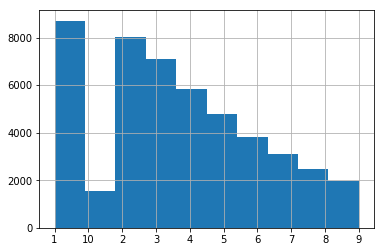

In [59]:
data_img.id_posicion.hist()

In [60]:
img = load_img(data_dir + "/6028499__posifoto5__qm2eyj82lhX.jpg")

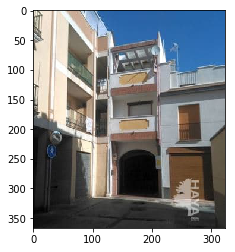

In [61]:
plt.imshow(img)

In [62]:
im_width = 64
im_height = 64
im_chan = 3

In [63]:
# Get and resize train images and masks
print('Getting and resizing train images and masks ... ')

x_img = np.zeros((len(clientes), 3*im_height, 3*im_width, im_chan), dtype=np.uint8)

for i in range (len(clientes)):
    
    basePath = os.path.sep.join([data_dir, "{}_*".format(clientes[i])])
    housePaths = sorted(list(glob.glob(basePath)))
    
    outputImage = np.zeros((3*im_height, 3*im_width, im_chan), dtype=np.uint8)
    
    for n in housePaths:
        image = cv2.imread(n)
        image = cv2.resize(image, (im_height, im_height))
        if n==1:
            outputImage[0*im_height:1*im_height, 0*im_width:1*im_width] = image
        elif n==2:
            outputImage[0*im_height:1*im_height, 1*im_width:2*im_width] = image
        elif n==3:
            outputImage[0*im_height:1*im_height, 2*im_width:3*im_width] = image
        elif n==4:
            outputImage[1*im_height:2*im_height, 0*im_width:1*im_width] = image
        elif n==5:
            outputImage[1*im_height:2*im_height, 1*im_width:2*im_width] = image
        elif n==6:
            outputImage[1*im_height:2*im_height, 2*im_width:3*im_width] = image
        elif n==7:
            outputImage[2*im_height:3*im_height, 0*im_width:1*im_width] = image
        elif n==8:
            outputImage[2*im_height:3*im_height, 1*im_width:2*im_width] = image
        elif n==9:
            outputImage[2*im_height:3*im_height, 2*im_width:3*im_width] = image
         
    x_img[i] = outputImage

print('Done!')

Getting and resizing train images and masks ... 
Done!


In [64]:
x_img = x_img / 255
print(x_img.shape)

(9400, 192, 192, 3)


In [65]:
x_data_cat1=to_categorical((data.iloc[:,1] // 1000),num_classes=52)
x_data_cat2=to_categorical((data.iloc[:,1] % 1000),num_classes=999)
encoder = LabelEncoder()
encoder.fit(data.HY_tipo)
x_data_cat3=to_categorical(encoder.transform(data.HY_tipo), num_classes = 20)
x_data_cat4=to_categorical(data.HY_cert_energ)
x_data_cat5=to_categorical(data.NW_count_photos, num_classes = 15)
x_data_cat6=to_categorical(data.IDEA_ind_elasticidad, num_classes = 6)
x_data_categorical = np.hstack((x_data_cat1, x_data_cat2, x_data_cat3, x_data_cat4, x_data_cat5, x_data_cat6))

x_data_continuas=data.iloc[:,[7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,54,55,56]]
scaler = StandardScaler().fit(x_data_continuas)
x_data_continuas = scaler.transform(x_data_continuas)

x_data = np.hstack((x_data_categorical, x_data_continuas))
print(x_data.shape)

y_data = np.log1p(data.iloc[:,52:53])
print(y_data.shape)

(9400, 1141)
(9400, 1)


In [66]:
valfrac = 0.20
cutpt = int(valfrac * x_data.shape[0])

f_train, f_test = x_data[cutpt: , 0:], x_data[0:cutpt: , 0:]
x_train, x_test = x_img[cutpt: , 0:], x_img[0:cutpt , 0:]
y_train, y_test  = y_data.iloc[cutpt:, 0:], y_data.iloc[0:cutpt, 0:] 

print(f_train.shape)
print(x_train.shape)
print(y_train.shape)

(7520, 1141)
(7520, 192, 192, 3)
(7520, 1)


# Función de error

In [67]:
import keras.backend as K

def median_abs_error (y_true, y_pred):
    return tf.contrib.distributions.percentile(K.abs(y_pred - y_true), q=50, axis=-1)

# Definición de modelo VAE + CNN

In [68]:
AE = Model(inputs=vae_features.input, outputs=vae_features.layers[-3].output)

In [69]:
base_model = MobileNet(input_shape=(192, 192, 3), alpha=1., weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
x = Dense(25, activation='relu')(x)
x = Dropout(0.15)(x)
top_model = Dense(5, activation='relu')(x)
CNN = Model(inputs=base_model.input, outputs=top_model)

In [70]:
combinedInput = concatenate([AE.output, CNN.output])

In [71]:
y = Dense(25, activation="relu")(combinedInput)
y = Dense(10, activation="relu")(y)
y = Dense(5, activation="relu")(y)
y = Dropout(0.15)(y)
y = Dense(1, activation="linear")(y)

In [72]:
full_model = Model(inputs=[AE.input, CNN.input], outputs=y)

In [73]:
#no entrenar las capas de la red pre - entrenada
layer_num = len(full_model.layers)
print(layer_num)

#for layer in full_model.layers[:75]:
#    layer.trainable = False

#for layer in full_model.layers[75:]:
#    layer.trainable = True

104


In [74]:
full_model.compile(optimizer='RMSProp', loss=median_abs_error, metrics=[median_abs_error])
full_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 192, 192, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 193, 193, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 96, 96, 32)   864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 96, 96, 32)   128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu

__________________________________________________________________________________________________
conv_dw_6_relu (ReLU)           (None, 12, 12, 256)  0           conv_dw_6_bn[0][0]               
__________________________________________________________________________________________________
conv_pw_6 (Conv2D)              (None, 12, 12, 512)  131072      conv_dw_6_relu[0][0]             
__________________________________________________________________________________________________
conv_pw_6_bn (BatchNormalizatio (None, 12, 12, 512)  2048        conv_pw_6[0][0]                  
__________________________________________________________________________________________________
conv_pw_6_relu (ReLU)           (None, 12, 12, 512)  0           conv_pw_6_bn[0][0]               
__________________________________________________________________________________________________
conv_dw_7 (DepthwiseConv2D)     (None, 12, 12, 512)  4608        conv_pw_6_relu[0][0]             
__________

__________________________________________________________________________________________________
conv_dw_13 (DepthwiseConv2D)    (None, 6, 6, 1024)   9216        conv_pw_12_relu[0][0]            
__________________________________________________________________________________________________
conv_dw_13_bn (BatchNormalizati (None, 6, 6, 1024)   4096        conv_dw_13[0][0]                 
__________________________________________________________________________________________________
conv_dw_13_relu (ReLU)          (None, 6, 6, 1024)   0           conv_dw_13_bn[0][0]              
__________________________________________________________________________________________________
conv_pw_13 (Conv2D)             (None, 6, 6, 1024)   1048576     conv_dw_13_relu[0][0]            
__________________________________________________________________________________________________
conv_pw_13_bn (BatchNormalizati (None, 6, 6, 1024)   4096        conv_pw_13[0][0]                 
__________

In [75]:
earlystopper = EarlyStopping(patience=15, verbose=1)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.00001, verbose=1)
checkpointer = ModelCheckpoint('cajamar_model_completo_v10.h5', monitor='val_median_abs_error', verbose=1, save_best_only=True, mode='min')
results = full_model.fit([f_train, x_train], y_train, validation_data=([f_test,x_test],y_test), batch_size=8, epochs=75, shuffle=True, verbose=0, callbacks=[checkpointer,earlystopper,reduce_lr])
full_model = load_model('cajamar_model_completo_v10.h5', custom_objects={'median_abs_error': median_abs_error, 'latent_dim': latent_dim, 'epsilon_std': epsilon_std})
full_model.save_weights('cajamar_weights_completo_v10.h5')


Epoch 00001: val_median_abs_error improved from inf to 0.71866, saving model to cajamar_model_completo_v10.h5

Epoch 00002: val_median_abs_error improved from 0.71866 to 0.60770, saving model to cajamar_model_completo_v10.h5

Epoch 00003: val_median_abs_error did not improve from 0.60770

Epoch 00004: val_median_abs_error did not improve from 0.60770

Epoch 00005: val_median_abs_error improved from 0.60770 to 0.60086, saving model to cajamar_model_completo_v10.h5

Epoch 00006: val_median_abs_error improved from 0.60086 to 0.57248, saving model to cajamar_model_completo_v10.h5

Epoch 00007: val_median_abs_error improved from 0.57248 to 0.55557, saving model to cajamar_model_completo_v10.h5

Epoch 00008: val_median_abs_error improved from 0.55557 to 0.54633, saving model to cajamar_model_completo_v10.h5

Epoch 00009: val_median_abs_error improved from 0.54633 to 0.54514, saving model to cajamar_model_completo_v10.h5

Epoch 00010: val_median_abs_error improved from 0.54514 to 0.53196, sa

In [76]:
full_model = load_model('cajamar_model_completo_v10.h5', custom_objects={'median_abs_error': median_abs_error, 'latent_dim': latent_dim, 'epsilon_std': epsilon_std})
full_model.load_weights('cajamar_weights_completo_v10.h5')

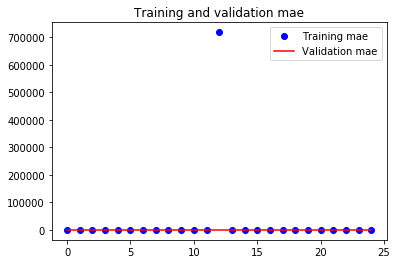

In [77]:
mae = results.history['median_abs_error']
val_mae = results.history['val_median_abs_error']
epochs = range(len(mae))
plt.figure()
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'r', label='Validation mae')
plt.title('Training and validation mae')
plt.legend()
plt.show()


In [78]:
y_pred_rnn = np.abs(full_model.predict([f_test,x_test]))

In [79]:
print(np.expm1(y_pred_rnn[0:10]))
print(np.expm1(y_test[0:10]))

[[45.68422 ]
 [35.652824]
 [52.18699 ]
 [52.73039 ]
 [53.40481 ]
 [75.04676 ]
 [79.32472 ]
 [72.06437 ]
 [49.425087]
 [45.021347]]
    TARGET
0    32.16
1    30.71
2    63.48
3   108.27
4     7.50
5    41.06
6    43.17
7    80.40
9    42.74
10   74.76


In [80]:
median_absolute_error(np.expm1(y_test), np.expm1(y_pred_rnn))

16.792744064331053

In [81]:
y_pred_rnn_tot = np.abs(full_model.predict([x_data,x_img]))

In [82]:
data["y_pred"] = np.expm1(y_pred_rnn_tot)

In [83]:
median_absolute_error(data.TARGET, data.y_pred)

17.351901245117187

# DIFERENCIAS DEL MEJOR MODELO

In [84]:
diference = data.TARGET - data.y_pred
data["diferencia"] = diference

In [85]:
data.iloc[:,[52,-2,-1]].head()

,TARGET,y_pred,diferencia
0,32.16,45.683430,-13.523430
1,30.71,35.665409,-4.955409
2,63.48,52.073349,11.406651
3,108.27,52.293827,55.976173
4,7.50,53.231003,-45.731003


In [86]:
data.loc[(np.abs(data['diferencia']) >= 200)].head()

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,NW_ind_reforma,NW_habitaciones,NW_count_photos,latente-1,latente-2,latente-3,latente-4,latente-5,y_pred,diferencia
176,6029324,46960,46,Plaza de garaje situada en la Calle Escultor M...,NaN,Garaje,2004.0,9.900000,23.84,0.0,...,0.0,0.0,3.0,1.397388,-1.186089,-0.185704,1.225464,-0.098649,41.127239,263.642761
184,6029429,29320,29,Plaza de garaje situada en la planta sótano de...,NaN,Garaje,2008.0,15.200000,16.25,0.0,...,0.0,0.0,7.0,0.379584,-1.386312,0.895763,-0.312567,0.462594,39.372398,323.957602
231,6029704,4569,4,Promoción de plazas de garaje situadas en un e...,NaN,Garaje,NaN,23.424078,27.00,0.0,...,0.0,0.0,1.0,0.938067,0.951892,0.781654,-1.858052,1.598811,15.766205,283.733795
347,6030324,42003,42,"Promoción de plazas de garaje, situadas en la...",NaN,Garaje,NaN,12.670000,25.00,0.0,...,0.0,0.0,1.0,3.995449,1.190807,1.460335,-0.346566,0.208551,40.483452,211.536548
377,6030461,26004,26,"Promoción de plazas de garaje, situadas en un ...",La plazas de garaje disponen de una superficie...,Garaje,NaN,12.800000,25.60,0.0,...,0.0,0.0,7.0,1.553378,-0.062740,-0.464113,3.636465,-0.180300,38.354969,259.525031


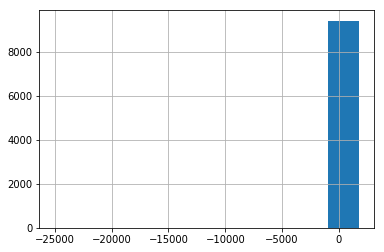

In [87]:
data['diferencia'].hist()

In [88]:
data_train_viviendas = data.iloc[:,[0,52,-2]]

In [89]:
data_train_viviendas.head()

,HY_id,TARGET,y_pred
0,6028499,32.16,45.683430
1,6028500,30.71,35.665409
2,6028502,63.48,52.073349
3,6028512,108.27,52.293827
4,6028513,7.50,53.231003


In [90]:
data_train_viviendas.to_csv("D:/MBIT-2017-18-Master-Deep-Learning/Reto - Cajamar - Febrero 2019/Datasets_Reto_Modelling_UH2019/Qlabs_train_completo.txt",index=False)

# Resultados por tipo de inmueble

In [91]:
data_garaje = data.loc[(data['HY_tipo'] == 'Garaje')]
median_absolute_error(data_garaje.TARGET, data_garaje.y_pred)

15.846080398559572

In [92]:
data_vivienda = data.loc[(data['HY_tipo'] == 'Casa de pueblo') | (data['HY_tipo'] == 'Chalet adosado') | (data['HY_tipo'] == 'Chalet independiente') | (data['HY_tipo'] == 'Chalet pareado') | (data['HY_tipo'] == 'Dúplex') | (data['HY_tipo'] == 'Ático') | (data['HY_tipo'] == 'Piso')]
median_absolute_error(data_vivienda.TARGET, data_vivienda.y_pred)

17.23802898406982

In [93]:
data_resto = data.loc[~((data['HY_tipo'] == 'Garaje') | (data['HY_tipo'] == 'Casa de pueblo') | (data['HY_tipo'] == 'Chalet adosado') | (data['HY_tipo'] == 'Chalet independiente') | (data['HY_tipo'] == 'Chalet pareado') | (data['HY_tipo'] == 'Dúplex') | (data['HY_tipo'] == 'Ático') | (data['HY_tipo'] == 'Piso'))]
median_absolute_error(data_resto.TARGET, data_resto.y_pred)

20.633574371337893

In [97]:
data_train_base = data.iloc[:,0]

In [98]:
data_train_base.to_csv("D:/MBIT-2017-18-Master-Deep-Learning/Reto - Cajamar - Febrero 2019/Datasets_Reto_Modelling_UH2019/Qlabs_train_base.txt",index=False)

# Resultado aplicando modelos por separado

In [99]:
data_train_ETL_final = pd.read_csv("D:/MBIT-2017-18-Master-Deep-Learning/Reto - Cajamar - Febrero 2019/Datasets_Reto_Modelling_UH2019/Qlabs_train_ETL_final.txt", sep=',',decimal=".")

In [100]:
median_absolute_error(data_train_ETL_final.TARGET, data_train_ETL_final.y_pred)

14.237404000000002